In [172]:
import os
import re
import csv
from datetime import datetime
import smtplib
from email.mime.text import MIMEText
import subprocess
from subprocess import check_output
import matplotlib.pyplot as plt
import pandas as pd
import time
import hashlib
import numpy as np

def extract_values(input_list):
    numeric_values = []
    converted_values = []

    for value_with_unit in input_list:
        match = re.match(r'(\d+\.\d+|\d+)(\w+)/s', value_with_unit)
        if match:
            numeric_value = float(match.group(1))
            unit = match.group(2)

            if unit == 'KiB':
                numeric_value /= 1024  # Convert KiB to MiB

            numeric_values.append(numeric_value)
            converted_values.append(f'{numeric_value}MiB/s')

    return numeric_values

def condition_generator(bs, qd, cs, pt, dt):
    conditions_lsvd_ssd_rr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'randread') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_rw = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'randwrite') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_sr = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'read') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    
    conditions_lsvd_ssd_sw = (
        (df['pool_type'] == pt) & 
        (df['disk_type'] == dt) & 
        (df['cache_size'] == cs) & 
        (df['workload'] == 'write') &
        (df['bs'] == bs) &
        (df['iodepth']==qd)
    )
    return conditions_lsvd_ssd_rr, conditions_lsvd_ssd_rw, conditions_lsvd_ssd_sr, conditions_lsvd_ssd_sw 
    

In [173]:
df = pd.read_csv("single_fio.csv")

bs='4ki'
qd=256
cs='20gb'
pt='ssd'
dt='lsvd'

conditions_lsvd_ssd_rr, conditions_lsvd_ssd_rw, conditions_lsvd_ssd_sr, conditions_lsvd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)

pt ='hdd'

conditions_lsvd_hdd_rr, conditions_lsvd_hdd_rw, conditions_lsvd_hdd_sr, conditions_lsvd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

dt='rbd'
pt='ssd'
cs='none'

conditions_rbd_ssd_rr, conditions_rbd_ssd_rw, conditions_rbd_ssd_sr, conditions_rbd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)
#condition for rbd_ssd


pt='hdd'

conditions_rbd_hdd_rr, conditions_rbd_hdd_rw, conditions_rbd_hdd_sr, conditions_rbd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)




In [174]:
bw_lsvd_ssd_rr=df[conditions_lsvd_ssd_rr]
bw_lsvd_ssd_rr=bw_lsvd_ssd_rr['bw'].iloc[0]
# print(bw_lsvd_ssd_rr)

bw_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
bw_rbd_ssd_rr=bw_rbd_ssd_rr['bw'].iloc[0]
# print(bw_rbd_ssd_rr)

bw_lsvd_ssd_rw=df[conditions_lsvd_ssd_rw]
bw_lsvd_ssd_rw=bw_lsvd_ssd_rw['bw'].iloc[0]
# print(bw_lsvd_ssd_rw)

bw_rbd_ssd_rw=df[conditions_rbd_ssd_rw]
bw_rbd_ssd_rw=bw_rbd_ssd_rw['bw'].iloc[0]
#print(bw_rbd_ssd_rw)

bw_lsvd_ssd_sr=df[conditions_lsvd_ssd_sr]
bw_lsvd_ssd_sr=bw_lsvd_ssd_sr['bw'].iloc[0]
#print(bw_lsvd_ssd_sr)

bw_rbd_ssd_sr=df[conditions_rbd_ssd_sr]
bw_rbd_ssd_sr=bw_rbd_ssd_sr['bw'].iloc[0]
#print(bw_rbd_ssd_sr)

bw_lsvd_ssd_sw=df[conditions_lsvd_ssd_sw]
bw_lsvd_ssd_sw=bw_lsvd_ssd_sw['bw'].iloc[0]
#print(bw_lsvd_ssd_sw)

bw_rbd_ssd_sw=df[conditions_rbd_ssd_sw]
bw_rbd_ssd_sw=bw_rbd_ssd_sw['bw'].iloc[0]
#print(bw_rbd_ssd_sw)

bw_ssd_array=[bw_lsvd_ssd_rr, bw_rbd_ssd_rr, bw_lsvd_ssd_rw, bw_rbd_ssd_rw,
              bw_lsvd_ssd_sr, bw_rbd_ssd_sr, bw_lsvd_ssd_sw, bw_rbd_ssd_sw ]
print(bw_ssd_array)
bw_ssd_array1 = extract_values(bw_ssd_array)
print(bw_ssd_array1)


['89.3MiB/s', '231MiB/s', '190MiB/s', '144MiB/s', '307MiB/s', '19.4MiB/s', '187MiB/s', '52.3MiB/s']
[89.3, 231.0, 190.0, 144.0, 307.0, 19.4, 187.0, 52.3]


In [175]:
bw_lsvd_hdd_rr=df[conditions_lsvd_hdd_rr]
bw_lsvd_hdd_rr=bw_lsvd_hdd_rr['bw'].iloc[0]
#print(bw_lsvd_hdd_rr)

bw_rbd_hdd_rr=df[conditions_rbd_hdd_rr]
bw_rbd_hdd_rr=bw_rbd_hdd_rr['bw'].iloc[0]
#print(bw_rbd_hdd_rr)

bw_lsvd_hdd_rw=df[conditions_lsvd_hdd_rw]
bw_lsvd_hdd_rw=bw_lsvd_hdd_rw['bw'].iloc[0]
#print(bw_lsvd_hdd_rw)

bw_rbd_hdd_rw=df[conditions_rbd_hdd_rw]
bw_rbd_hdd_rw=bw_rbd_hdd_rw['bw'].iloc[0]
#print(bw_rbd_hdd_rw)

bw_lsvd_hdd_sr=df[conditions_lsvd_hdd_sr]
bw_lsvd_hdd_sr=bw_lsvd_hdd_sr['bw'].iloc[0]
#print(bw_lsvd_hdd_sr)

bw_rbd_hdd_sr=df[conditions_rbd_hdd_sr]
bw_rbd_hdd_sr=bw_rbd_hdd_sr['bw'].iloc[0]
#print(bw_rbd_hdd_sr)

bw_lsvd_hdd_sw=df[conditions_lsvd_hdd_sw]
bw_lsvd_hdd_sw=bw_lsvd_hdd_sw['bw'].iloc[0]
#print(bw_lsvd_hdd_sw)

bw_rbd_hdd_sw=df[conditions_rbd_hdd_sw]
bw_rbd_hdd_sw=bw_rbd_hdd_sw['bw'].iloc[0]
#print(bw_rbd_hdd_sw)

bw_hdd_array=[bw_lsvd_hdd_rr, bw_rbd_hdd_rr, bw_lsvd_hdd_rw, bw_rbd_hdd_rw,
              bw_lsvd_hdd_sr, bw_rbd_hdd_sr, bw_lsvd_hdd_sw, bw_rbd_hdd_sw ]
bw_ssd_array1 = extract_values(bw_hdd_array)
#print(bw_ssd_array)

lsvd_ssd_bw=[bw_lsvd_ssd_rr, bw_lsvd_ssd_rw, bw_lsvd_ssd_sr, bw_lsvd_ssd_sw]
lsvd_ssd_bw1 = extract_values(lsvd_ssd_bw)
rbd_ssd_bw=[bw_rbd_ssd_rr, bw_rbd_ssd_rw, bw_rbd_ssd_sr, bw_rbd_ssd_sw]
rbd_ssd_bw1 = extract_values(rbd_ssd_bw)
print(lsvd_ssd_bw, rbd_ssd_bw)


lsvd_hdd_bw=[bw_lsvd_hdd_rr, bw_lsvd_hdd_rw, bw_lsvd_hdd_sr, bw_lsvd_hdd_sw]
lsvd_hdd_bw1 = extract_values(lsvd_hdd_bw)
rbd_hdd_bw=[bw_rbd_hdd_rr, bw_rbd_hdd_rw, bw_rbd_hdd_sr, bw_rbd_hdd_sw]
rbd_hdd_bw1 = extract_values(rbd_hdd_bw)
print(lsvd_hdd_bw, rbd_hdd_bw)

xlabel=['rand read', 'rand write', 'seq read', 'seq write']

['89.3MiB/s', '190MiB/s', '307MiB/s', '187MiB/s'] ['231MiB/s', '144MiB/s', '19.4MiB/s', '52.3MiB/s']
['20.4MiB/s', '180MiB/s', '309MiB/s', '184MiB/s'] ['31.5MiB/s', '4907KiB/s', '19.8MiB/s', '7194KiB/s']


lsvd_ssd_bw ['89.3MiB/s', '190MiB/s', '307MiB/s', '187MiB/s']
rbd_ssd_bw ['231MiB/s', '144MiB/s', '19.4MiB/s', '52.3MiB/s']


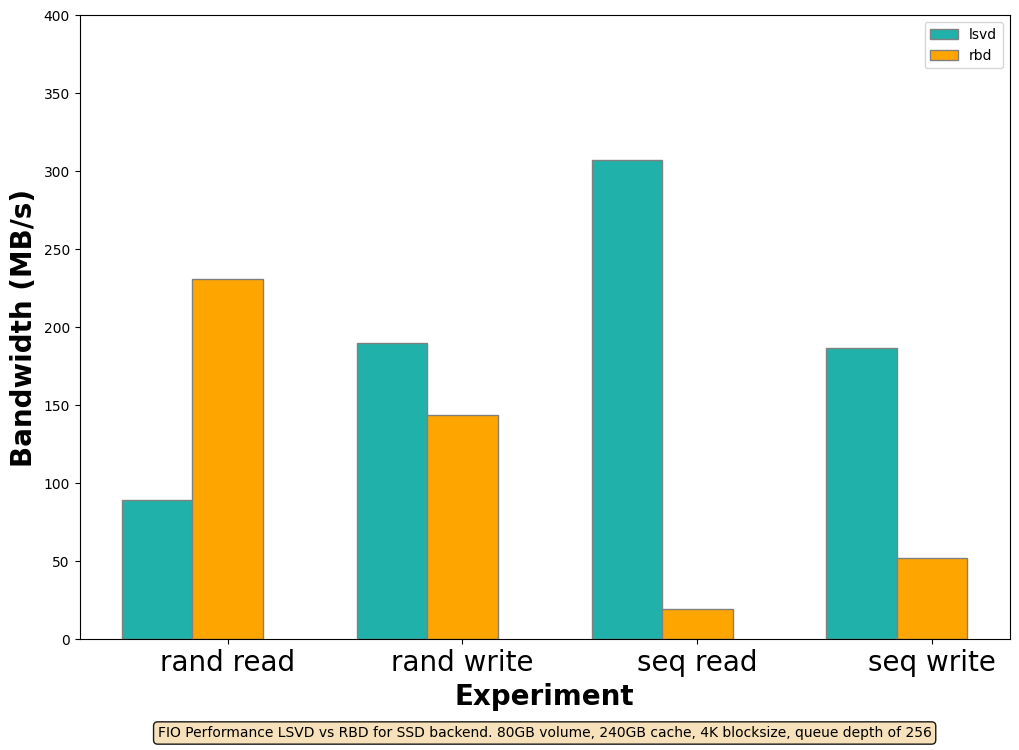

In [177]:
barWidth = 0.30
fig = plt.subplots(figsize =(12, 8)) 

print('lsvd_ssd_bw', lsvd_ssd_bw)
print('rbd_ssd_bw', rbd_ssd_bw)

 
 
br1 = np.arange(len(lsvd_ssd_bw1)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 
# # Make the plot
plt.bar(br1, lsvd_ssd_bw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_ssd_bw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
  
plt.xlabel('Experiment', fontweight ='bold', fontsize = 20) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 20) 
plt.ylim(0, 400)
plt.xticks([r + barWidth for r in range(len(lsvd_hdd_bw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance LSVD vs RBD for SSD backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_ssd_240gb.png')
plt.show()




lsvd_hdd_bw ['20.4MiB/s', '180MiB/s', '309MiB/s', '184MiB/s']
rbd_hdd_bw ['31.5MiB/s', '4907KiB/s', '19.8MiB/s', '7194KiB/s']


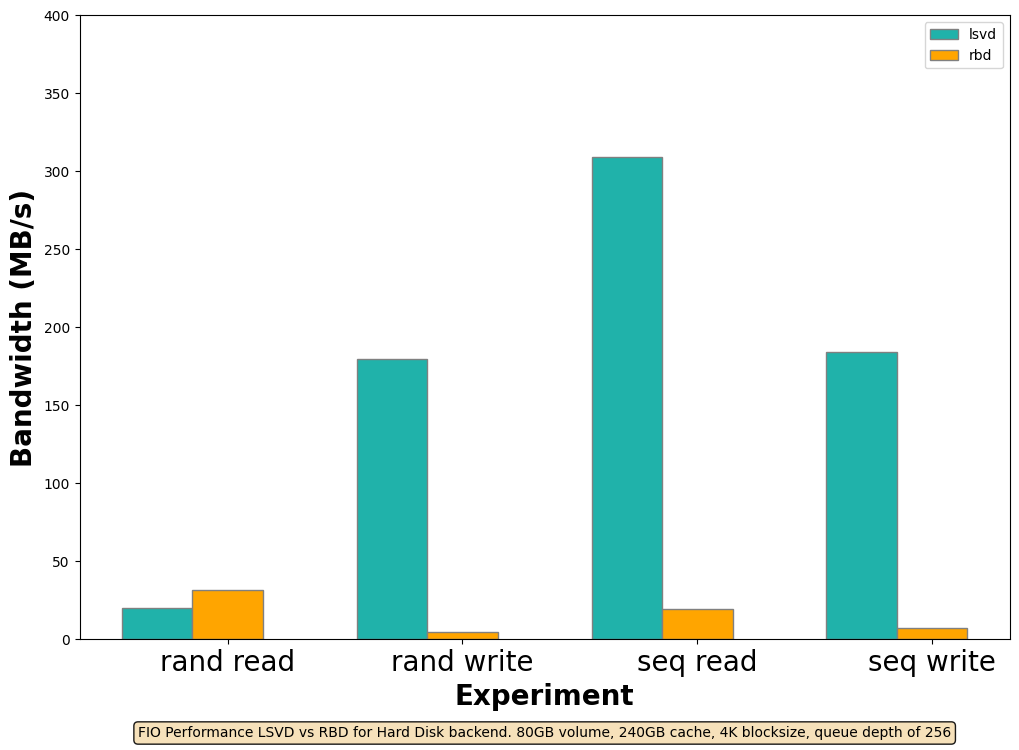

In [178]:
barWidth = 0.30
fig = plt.subplots(figsize =(12, 8)) 

print('lsvd_hdd_bw', lsvd_hdd_bw)
print('rbd_hdd_bw', rbd_hdd_bw)

 
br1 = np.arange(len(lsvd_hdd_bw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_hdd_bw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_hdd_bw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Experiment', fontweight ='bold', fontsize = 20) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 20)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_hdd_bw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance LSVD vs RBD for Hard Disk backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_hdd_240gb.png')
plt.show()

lsvd_hdd_bw ['20.4MiB/s', '180MiB/s', '309MiB/s', '184MiB/s']
rbd_hdd_bw ['31.5MiB/s', '4907KiB/s', '19.8MiB/s', '7194KiB/s']


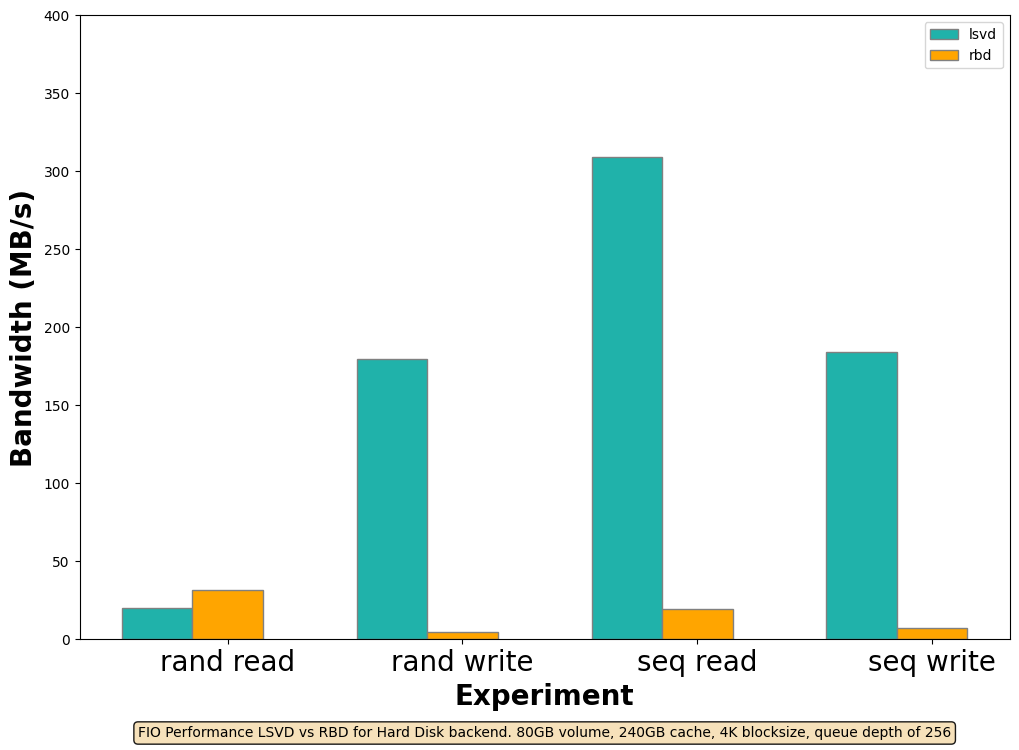

In [179]:
barWidth = 0.30
fig = plt.subplots(figsize =(12, 8)) 

print('lsvd_hdd_bw', lsvd_hdd_bw)
print('rbd_hdd_bw', rbd_hdd_bw)

 
br1 = np.arange(len(lsvd_hdd_bw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_hdd_bw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_hdd_bw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Experiment', fontweight ='bold', fontsize = 20) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 20)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_hdd_bw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance LSVD vs RBD for Hard Disk backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_hdd_240gb.png')
plt.show()

In [180]:
lsvd_bw_rr= [bw_lsvd_ssd_rr, bw_lsvd_hdd_rr]
lsvd_bw_rr1 = extract_values(lsvd_bw_rr)
print(lsvd_bw_rr)
rbd_bw_rr = [bw_rbd_ssd_rr, bw_rbd_hdd_rr]
rbd_bw_rr1 = extract_values([bw_rbd_ssd_rr, bw_rbd_hdd_rr])
print(rbd_bw_rr)

lsvd_bw_rw= [bw_lsvd_ssd_rw, bw_lsvd_hdd_rw]
lsvd_bw_rw1 = extract_values(lsvd_bw_rw)
print(lsvd_bw_rw)
rbd_bw_rw = [bw_rbd_ssd_rw, bw_rbd_hdd_rw]
rbd_bw_rw1 = extract_values([bw_rbd_ssd_rw, bw_rbd_hdd_rw])
print(rbd_bw_rw)

lsvd_bw_sr= [bw_lsvd_ssd_sr, bw_lsvd_hdd_sr]
lsvd_bw_sr1 = extract_values(lsvd_bw_sr)
print(lsvd_bw_sr)
rbd_bw_sr = [bw_rbd_ssd_sr, bw_rbd_hdd_sr]
rbd_bw_sr1 = extract_values([bw_rbd_ssd_sr, bw_rbd_hdd_sr])
print(rbd_bw_sr)

lsvd_bw_sw= [bw_lsvd_ssd_sw, bw_lsvd_hdd_sw]
lsvd_bw_sw1 = extract_values(lsvd_bw_sw)
print(lsvd_bw_sw)
rbd_bw_sw = [bw_rbd_ssd_sw, bw_rbd_hdd_sw]
rbd_bw_sw1 = extract_values([bw_rbd_ssd_sw, bw_rbd_hdd_sw])
print(rbd_bw_sw)

xlabel=['SSD', 'HDD']

['89.3MiB/s', '20.4MiB/s']
['231MiB/s', '31.5MiB/s']
['190MiB/s', '180MiB/s']
['144MiB/s', '4907KiB/s']
['307MiB/s', '309MiB/s']
['19.4MiB/s', '19.8MiB/s']
['187MiB/s', '184MiB/s']
['52.3MiB/s', '7194KiB/s']


lsvd_bw_rr ['89.3MiB/s', '20.4MiB/s']
rbd_bw_rr ['231MiB/s', '31.5MiB/s']


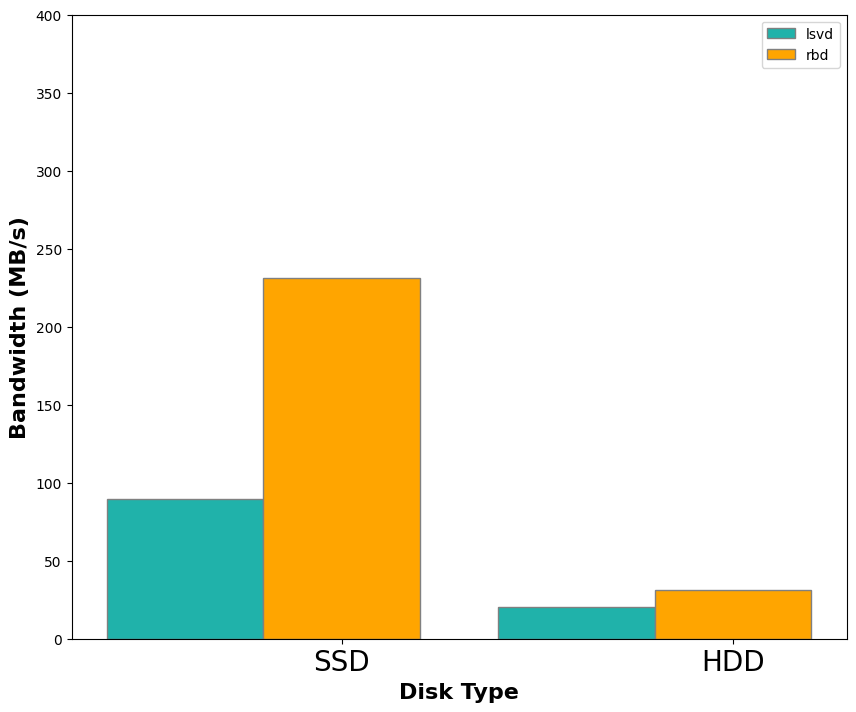

In [181]:
barWidth = 0.40
fig = plt.subplots(figsize =(10, 8)) 

print('lsvd_bw_rr', lsvd_bw_rr)
print('rbd_bw_rr', rbd_bw_rr)

 
br1 = np.arange(len(lsvd_bw_rr)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_bw_rr1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_bw_rr1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 16)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_bw_rr))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_rr_240gb.png')
plt.show()

lsvd_bw_rw ['190MiB/s', '180MiB/s']
rbd_bw_rw ['144MiB/s', '4907KiB/s']


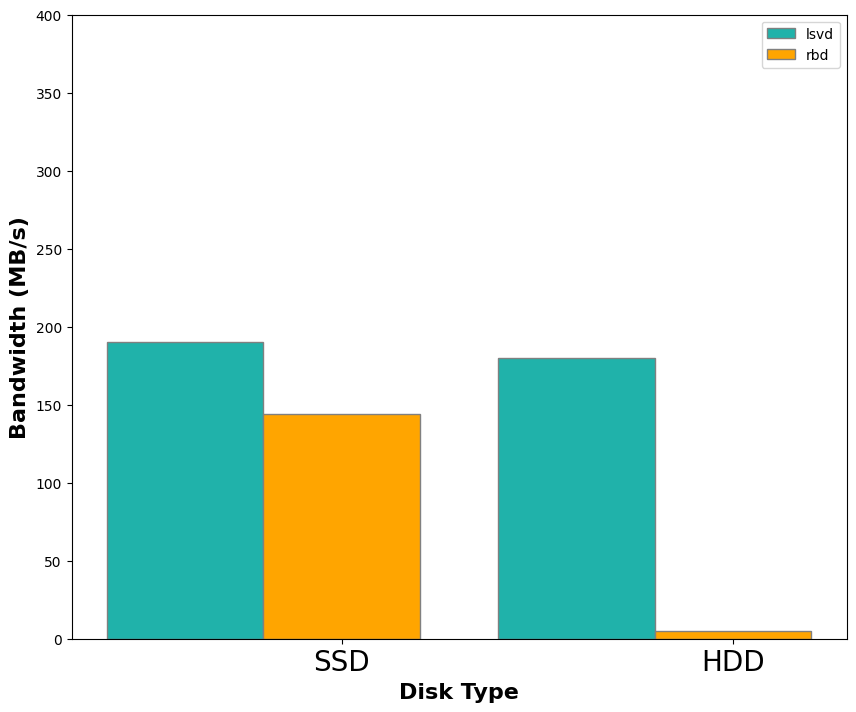

In [182]:
barWidth = 0.40
fig = plt.subplots(figsize =(10, 8)) 

print('lsvd_bw_rw', lsvd_bw_rw)
print('rbd_bw_rw', rbd_bw_rw)

 
br1 = np.arange(len(lsvd_bw_rw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_bw_rw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_bw_rw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 16)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_bw_rw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance for Random Write for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_rw_240gb.png')
plt.show()

lsvd_bw_sr ['307MiB/s', '309MiB/s']
rbd_bw_sr ['19.4MiB/s', '19.8MiB/s']


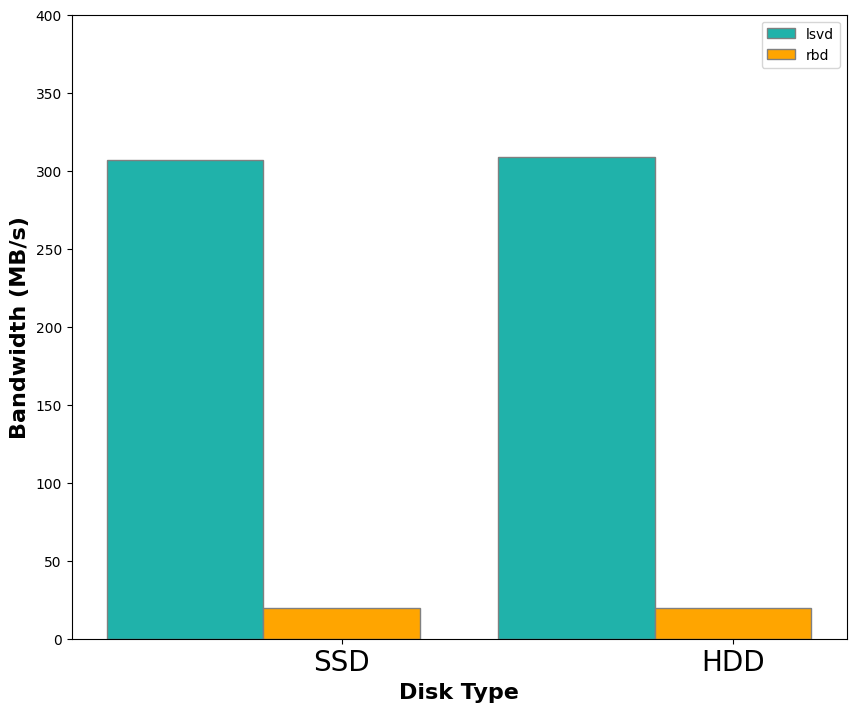

In [183]:
barWidth = 0.40
fig = plt.subplots(figsize =(10, 8)) 

print('lsvd_bw_sr', lsvd_bw_sr)
print('rbd_bw_sr', rbd_bw_sr)

 
br1 = np.arange(len(lsvd_bw_sr)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_bw_sr1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_bw_sr1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 16)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_bw_sr))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance for Random Write for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_sr_240gb.png')
plt.show()

lsvd_bw_sw ['187MiB/s', '184MiB/s']
rbd_bw_sw ['52.3MiB/s', '7194KiB/s']


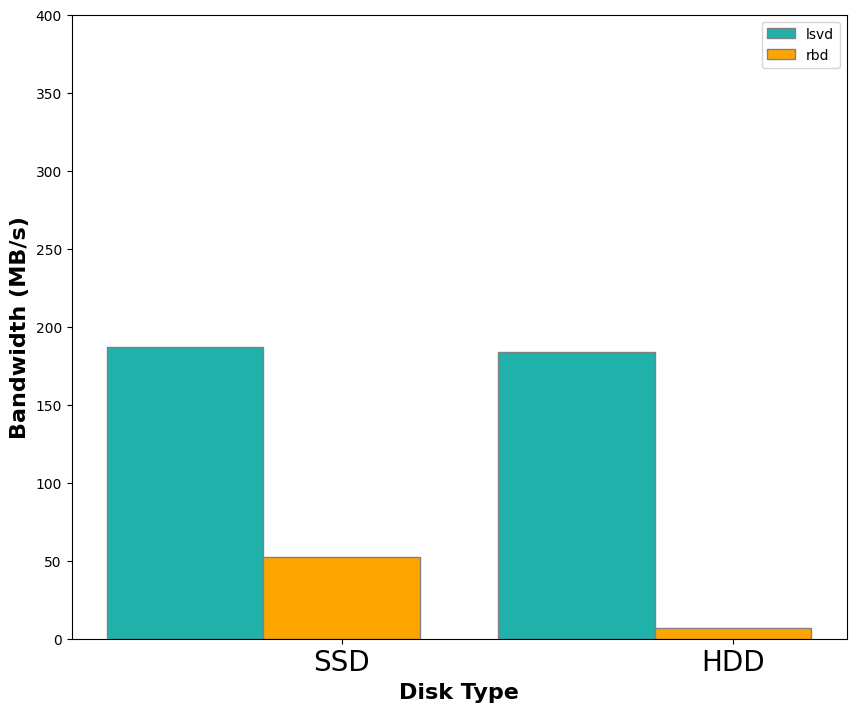

In [184]:
barWidth = 0.40
fig = plt.subplots(figsize =(10, 8)) 

print('lsvd_bw_sw', lsvd_bw_sw)
print('rbd_bw_sw', rbd_bw_sw)

 
br1 = np.arange(len(lsvd_bw_sw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_bw_sw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_bw_sw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 16)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_bw_sw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance for Random Write for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_sw_240gb.png')
plt.show()

In [185]:

bs='4ki'
qd=256
cs='20gb'
pt='ssd'
dt='lsvd'

conditions_lsvd_ssd_rr, conditions_lsvd_ssd_rw, conditions_lsvd_ssd_sr, conditions_lsvd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)

pt ='hdd'

conditions_lsvd_hdd_rr, conditions_lsvd_hdd_rw, conditions_lsvd_hdd_sr, conditions_lsvd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

dt='rbd'
pt='ssd'
cs='none'

conditions_rbd_ssd_rr, conditions_rbd_ssd_rw, conditions_rbd_ssd_sr, conditions_rbd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)
#condition for rbd_ssd


pt='hdd'

conditions_rbd_hdd_rr, conditions_rbd_hdd_rw, conditions_rbd_hdd_sr, conditions_rbd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

bw_lsvd_ssd_rr=df[conditions_lsvd_ssd_rr]
bw_lsvd_ssd_rr=bw_lsvd_ssd_rr['bw'].iloc[0]
# print(bw_lsvd_ssd_rr)

bw_rbd_ssd_rr=df[conditions_rbd_ssd_rr]
bw_rbd_ssd_rr=bw_rbd_ssd_rr['bw'].iloc[0]
# print(bw_rbd_ssd_rr)

bw_lsvd_ssd_rw=df[conditions_lsvd_ssd_rw]
bw_lsvd_ssd_rw=bw_lsvd_ssd_rw['bw'].iloc[0]
# print(bw_lsvd_ssd_rw)

bw_rbd_ssd_rw=df[conditions_rbd_ssd_rw]
bw_rbd_ssd_rw=bw_rbd_ssd_rw['bw'].iloc[0]
#print(bw_rbd_ssd_rw)

bw_lsvd_ssd_sr=df[conditions_lsvd_ssd_sr]
bw_lsvd_ssd_sr=bw_lsvd_ssd_sr['bw'].iloc[0]
#print(bw_lsvd_ssd_sr)

bw_rbd_ssd_sr=df[conditions_rbd_ssd_sr]
bw_rbd_ssd_sr=bw_rbd_ssd_sr['bw'].iloc[0]
#print(bw_rbd_ssd_sr)

bw_lsvd_ssd_sw=df[conditions_lsvd_ssd_sw]
bw_lsvd_ssd_sw=bw_lsvd_ssd_sw['bw'].iloc[0]
#print(bw_lsvd_ssd_sw)

bw_rbd_ssd_sw=df[conditions_rbd_ssd_sw]
bw_rbd_ssd_sw=bw_rbd_ssd_sw['bw'].iloc[0]
#print(bw_rbd_ssd_sw)

bw_ssd_array=[bw_lsvd_ssd_rr, bw_rbd_ssd_rr, bw_lsvd_ssd_rw, bw_rbd_ssd_rw,
              bw_lsvd_ssd_sr, bw_rbd_ssd_sr, bw_lsvd_ssd_sw, bw_rbd_ssd_sw ]
print(bw_ssd_array)
bw_ssd_array1 = extract_values(bw_ssd_array)
print(bw_ssd_array1)

xlabel=['rand read', 'rand write', 'seq read', 'seq write']

['89.3MiB/s', '231MiB/s', '190MiB/s', '144MiB/s', '307MiB/s', '19.4MiB/s', '187MiB/s', '52.3MiB/s']
[89.3, 231.0, 190.0, 144.0, 307.0, 19.4, 187.0, 52.3]


lsvd_ssd_bw ['89.3MiB/s', '190MiB/s', '307MiB/s', '187MiB/s']
rbd_ssd_bw ['231MiB/s', '144MiB/s', '19.4MiB/s', '52.3MiB/s']


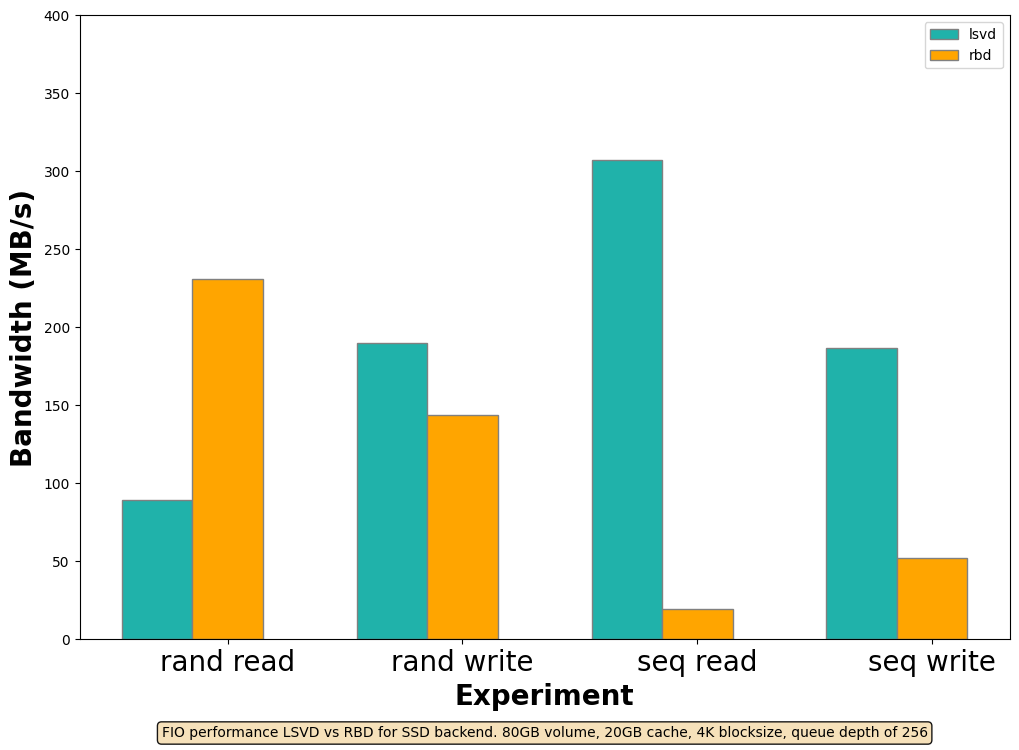

In [186]:

# fio_x =  df.loc[conditions_lsvd_ssd].head(5)['iodepth'].to_numpy() 
# # set width of bar 
barWidth = 0.30
fig = plt.subplots(figsize =(12, 8)) 

print('lsvd_ssd_bw', lsvd_ssd_bw)
print('rbd_ssd_bw', rbd_ssd_bw)
 
br1 = np.arange(len(lsvd_ssd_bw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_ssd_bw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_ssd_bw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
# Adding Xticks 
plt.xlabel('Experiment', fontweight ='bold', fontsize = 20) 
plt.ylim(0, 400)
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 20) 
plt.xticks([r + barWidth for r in range(len(lsvd_hdd_bw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO performance LSVD vs RBD for SSD backend. 80GB volume, 20GB cache, 4K blocksize, queue depth of 256"
plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_ssd_20gb.png')
plt.show()



lsvd_hdd_bw ['20.4MiB/s', '180MiB/s', '309MiB/s', '184MiB/s']
rbd_hdd_bw ['31.5MiB/s', '4907KiB/s', '19.8MiB/s', '7194KiB/s']


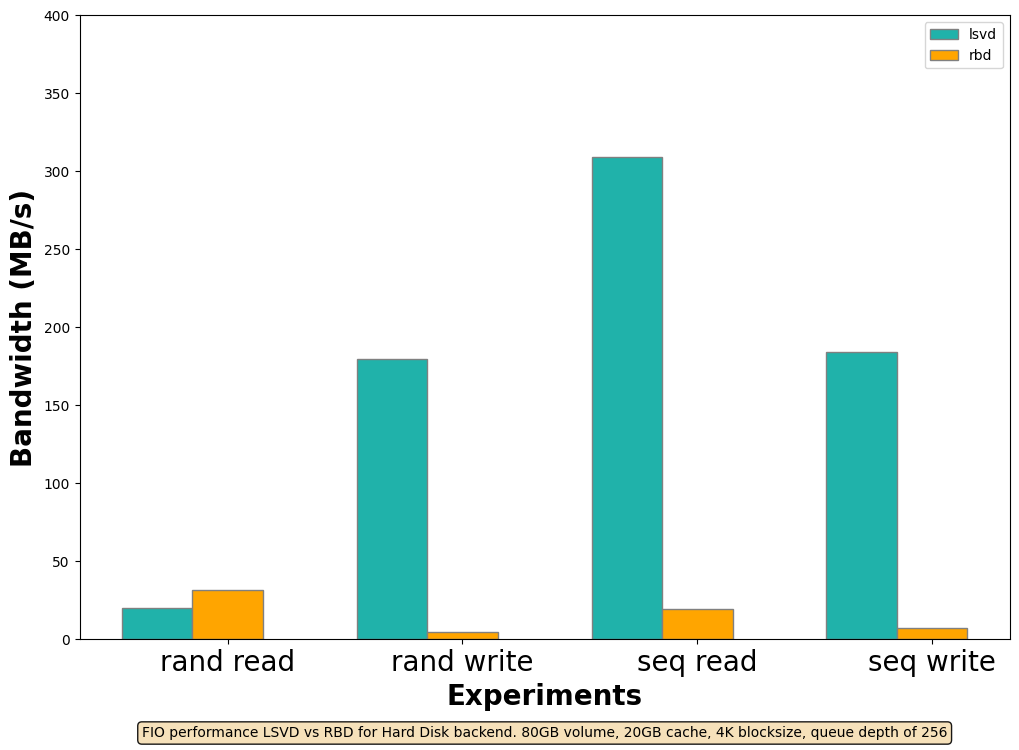

In [187]:
barWidth = 0.30
fig = plt.subplots(figsize =(12, 8)) 

print('lsvd_hdd_bw', lsvd_hdd_bw)
print('rbd_hdd_bw', rbd_hdd_bw)

# # # Set position of bar on X axis 
br1 = np.arange(len(lsvd_hdd_bw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 
# # Make the plot
plt.bar(br1, lsvd_hdd_bw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_hdd_bw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
# Adding Xticks 
plt.xlabel('Experiments', fontweight ='bold', fontsize = 20) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 20) 
plt.ylim(0, 400)
plt.xticks([r + barWidth for r in range(len(lsvd_hdd_bw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO performance LSVD vs RBD for Hard Disk backend. 80GB volume, 20GB cache, 4K blocksize, queue depth of 256"
plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_hdd_20gb.png')
plt.show()

In [188]:
lsvd_bw_rr= [bw_lsvd_ssd_rr, bw_lsvd_hdd_rr]
lsvd_bw_rr1 = extract_values(lsvd_bw_rr)
print(lsvd_bw_rr)
rbd_bw_rr = [bw_rbd_ssd_rr, bw_rbd_hdd_rr]
rbd_bw_rr1 = extract_values([bw_rbd_ssd_rr, bw_rbd_hdd_rr])
print(rbd_bw_rr)

lsvd_bw_rw= [bw_lsvd_ssd_rw, bw_lsvd_hdd_rw]
lsvd_bw_rw1 = extract_values(lsvd_bw_rw)
print(lsvd_bw_rw)
rbd_bw_rw = [bw_rbd_ssd_rw, bw_rbd_hdd_rw]
rbd_bw_rw1 = extract_values([bw_rbd_ssd_rw, bw_rbd_hdd_rw])
print(rbd_bw_rw)

lsvd_bw_sr= [bw_lsvd_ssd_sr, bw_lsvd_hdd_sr]
lsvd_bw_sr1 = extract_values(lsvd_bw_sr)
print(lsvd_bw_sr)
rbd_bw_sr = [bw_rbd_ssd_sr, bw_rbd_hdd_sr]
rbd_bw_sr1 = extract_values([bw_rbd_ssd_sr, bw_rbd_hdd_sr])
print(rbd_bw_sr)

lsvd_bw_sw= [bw_lsvd_ssd_sw, bw_lsvd_hdd_sw]
lsvd_bw_sw1 = extract_values(lsvd_bw_sw)
print(lsvd_bw_sw)
rbd_bw_sw = [bw_rbd_ssd_sw, bw_rbd_hdd_sw]
rbd_bw_sw1 = extract_values([bw_rbd_ssd_sw, bw_rbd_hdd_sw])
print(rbd_bw_sw)

xlabel=['SSD', 'HDD']

['89.3MiB/s', '20.4MiB/s']
['231MiB/s', '31.5MiB/s']
['190MiB/s', '180MiB/s']
['144MiB/s', '4907KiB/s']
['307MiB/s', '309MiB/s']
['19.4MiB/s', '19.8MiB/s']
['187MiB/s', '184MiB/s']
['52.3MiB/s', '7194KiB/s']


lsvd_bw_rr ['89.3MiB/s', '20.4MiB/s']
rbd_bw_rr ['231MiB/s', '31.5MiB/s']


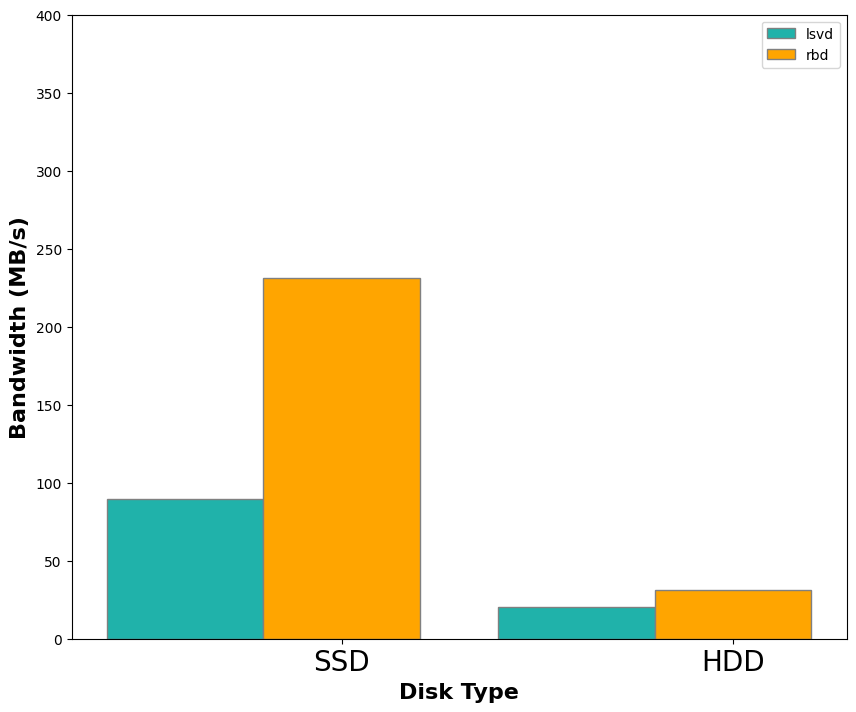

In [205]:
barWidth = 0.40
fig = plt.subplots(figsize =(10, 8)) 

print('lsvd_bw_rr', lsvd_bw_rr)
print('rbd_bw_rr', rbd_bw_rr)

 
br1 = np.arange(len(lsvd_bw_rr)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_bw_rr1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_bw_rr1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 16)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_bw_rr))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_rr_20gb.png')
plt.show()

lsvd_bw_rw ['190MiB/s', '180MiB/s']
rbd_bw_rw ['144MiB/s', '4907KiB/s']


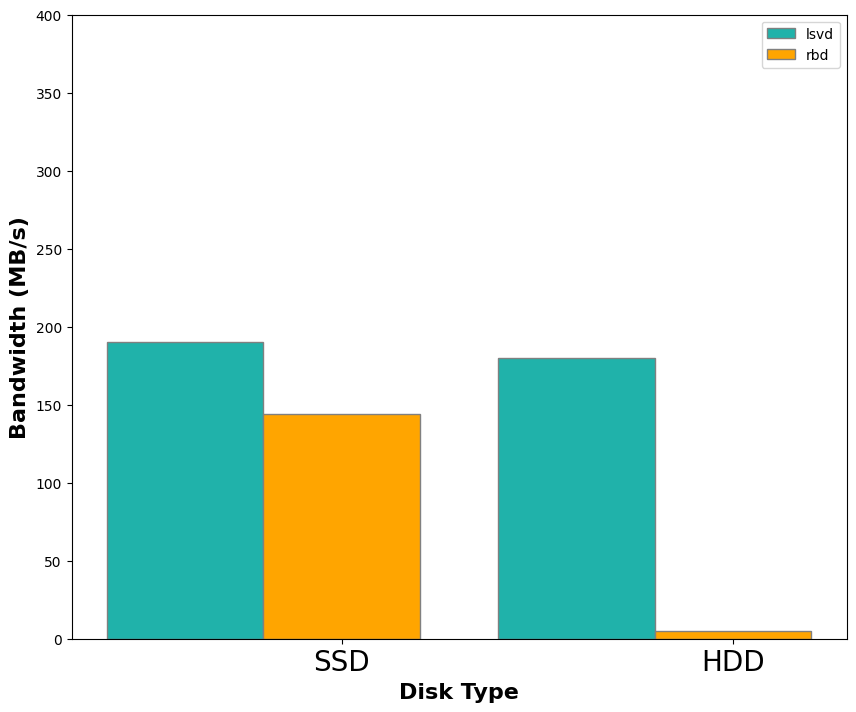

In [190]:
barWidth = 0.40
fig = plt.subplots(figsize =(10, 8)) 

print('lsvd_bw_rw', lsvd_bw_rw)
print('rbd_bw_rw', rbd_bw_rw)

 
br1 = np.arange(len(lsvd_bw_rw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_bw_rw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_bw_rw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 16)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_bw_rw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance for Random Write for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_rw_20gb.png')
plt.show()

lsvd_bw_sr ['307MiB/s', '309MiB/s']
rbd_bw_sr ['19.4MiB/s', '19.8MiB/s']


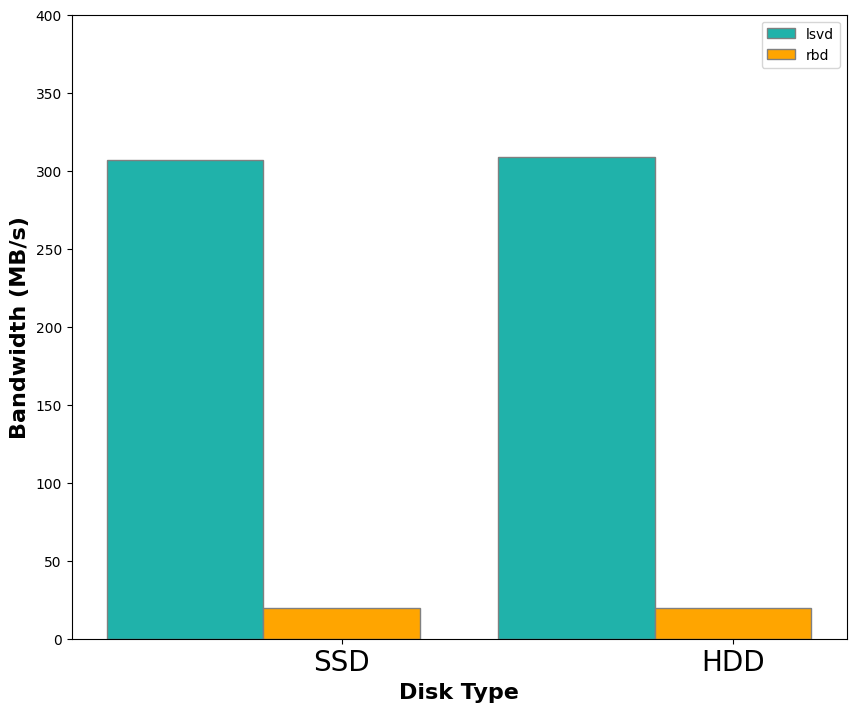

In [191]:
barWidth = 0.40
fig = plt.subplots(figsize =(10, 8)) 

print('lsvd_bw_sr', lsvd_bw_sr)
print('rbd_bw_sr', rbd_bw_sr)

 
br1 = np.arange(len(lsvd_bw_sr)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_bw_sr1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_bw_sr1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 16)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_bw_sr))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance for Random Write for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_sr_20gb.png')
plt.show()

lsvd_bw_sw ['187MiB/s', '184MiB/s']
rbd_bw_sw ['52.3MiB/s', '7194KiB/s']


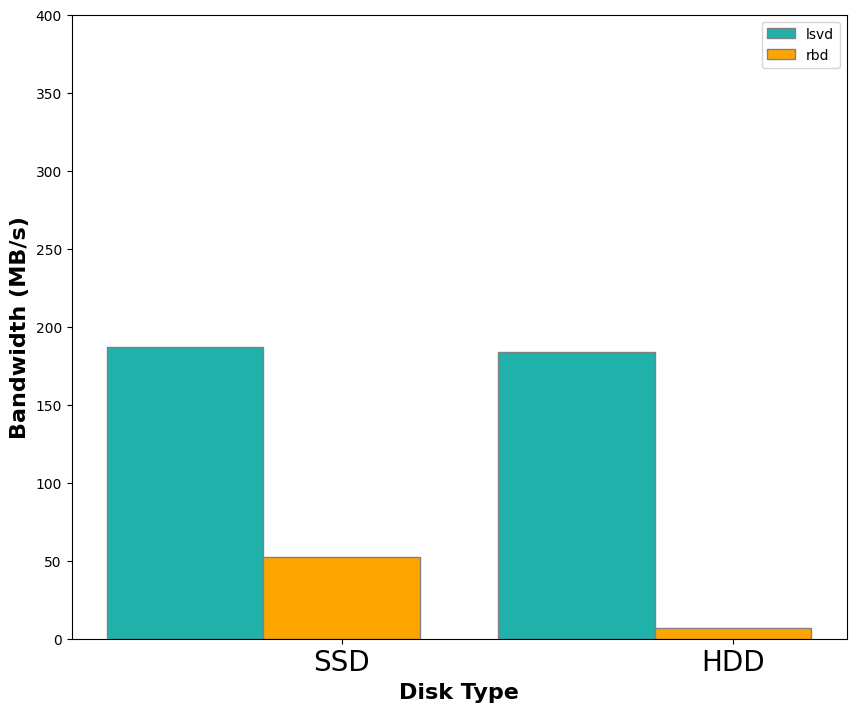

In [192]:
barWidth = 0.40
fig = plt.subplots(figsize =(10, 8)) 

print('lsvd_bw_sw', lsvd_bw_sw)
print('rbd_bw_sw', rbd_bw_sw)

 
br1 = np.arange(len(lsvd_bw_sw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_bw_sw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_bw_sw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 16)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_bw_sw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance for Random Write for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_sw_20gb.png')
plt.show()

In [ ]:
xlabel=['rand read', 'rand write', 'seq read', 'seq write']
barWidth = 0.40
fig = plt.subplots(figsize =(10, 8)) 

print('lsvd_bw_sw', lsvd_bw_sw)
print('rbd_bw_sw', rbd_bw_sw)

 
br1 = np.arange(len(lsvd_bw_sw)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_bw_sw1, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd') 
plt.bar(br2, rbd_bw_sw1, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='rbd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 16)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_bw_sw))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance for Random Write for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
plt.savefig('request_bw_sw_20gb.png')
plt.show()

In [ ]:
bs='4ki'
qd=256
cs='20gb'
pt='ssd'
dt='lsvd'

conditions_20gb_lsvd_ssd_rr, conditions_20gb_lsvd_ssd_rw, conditions_20gb_lsvd_ssd_sr, conditions_20gb_lsvd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)

pt ='hdd'

conditions_20gb_lsvd_hdd_rr, conditions_20gb_lsvd_hdd_rw, conditions_20gb_lsvd_hdd_sr, conditions_20gb_lsvd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

dt='rbd'
pt='ssd'
cs='none'

conditions_20gb_rbd_ssd_rr, conditions_20gb_rbd_ssd_rw, conditions_20gb_rbd_ssd_sr, conditions_20gb_rbd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)
#condition for rbd_ssd


pt='hdd'

conditions_20gb_rbd_hdd_rr, conditions_20gb_rbd_hdd_rw, conditions_20gb_rbd_hdd_sr, conditions_20gb_rbd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

bw_20gb_lsvd_ssd_rr=df[conditions_20gb_lsvd_ssd_rr]
bw_20gb_lsvd_ssd_rr=bw_20gb_lsvd_ssd_rr['bw'].iloc[0]
# print(bw_20gb_lsvd_ssd_rr)

bw_20gb_rbd_ssd_rr=df[conditions_20gb_rbd_ssd_rr]
bw_20gb_rbd_ssd_rr=bw_20gb_rbd_ssd_rr['bw'].iloc[0]
# print(bw_20gb_rbd_ssd_rr)

bw_20gb_lsvd_ssd_rw=df[conditions_20gb_lsvd_ssd_rw]
bw_20gb_lsvd_ssd_rw=bw_20gb_lsvd_ssd_rw['bw'].iloc[0]
# print(bw_20gb_lsvd_ssd_rw)

bw_20gb_rbd_ssd_rw=df[conditions_20gb_rbd_ssd_rw]
bw_20gb_rbd_ssd_rw=bw_20gb_rbd_ssd_rw['bw'].iloc[0]
#print(bw_20gb_rbd_ssd_rw)

bw_20gb_lsvd_ssd_sr=df[conditions_20gb_lsvd_ssd_sr]
bw_20gb_lsvd_ssd_sr=bw_20gb_lsvd_ssd_sr['bw'].iloc[0]
#print(bw_20gb_lsvd_ssd_sr)

bw_20gb_rbd_ssd_sr=df[conditions_20gb_rbd_ssd_sr]
bw_20gb_rbd_ssd_sr=bw_20gb_rbd_ssd_sr['bw'].iloc[0]
#print(bw_20gb_rbd_ssd_sr)

bw_20gb_lsvd_ssd_sw=df[conditions_20gb_lsvd_ssd_sw]
bw_20gb_lsvd_ssd_sw=bw_20gb_lsvd_ssd_sw['bw'].iloc[0]
#print(bw_20gb_lsvd_ssd_sw)

bw_20gb_rbd_ssd_sw=df[conditions_20gb_rbd_ssd_sw]
bw_20gb_rbd_ssd_sw=bw_20gb_rbd_ssd_sw['bw'].iloc[0]
#print(bw_20gb_rbd_ssd_sw)

bw_20gb_ssd_array=[bw_20gb_lsvd_ssd_rr, bw_20gb_rbd_ssd_rr, bw_20gb_lsvd_ssd_rw, bw_20gb_rbd_ssd_rw,
              bw_20gb_lsvd_ssd_sr, bw_20gb_rbd_ssd_sr, bw_20gb_lsvd_ssd_sw, bw_20gb_rbd_ssd_sw ]
print(bw_20gb_ssd_array)
bw_20gb_ssd_array1 = extract_values(bw_20gb_ssd_array)
print(bw_20gb_ssd_array1)

In [1]:
df = pd.read_csv("single_fio.csv")

bs='4ki'
qd=256
cs='240gb'
pt='ssd'
dt='lsvd'

conditions_240gb_lsvd_ssd_rr, conditions_240gb_lsvd_ssd_rw, conditions_240gb_lsvd_ssd_sr, conditions_240gb_lsvd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)

pt ='hdd'

conditions_240gb_lsvd_hdd_rr, conditions_240gb_lsvd_hdd_rw, conditions_240gb_lsvd_hdd_sr, conditions_240gb_lsvd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

dt='rbd'
pt='ssd'
cs='none'

conditions_240gb_rbd_ssd_rr, conditions_240gb_rbd_ssd_rw, conditions_240gb_rbd_ssd_sr, conditions_240gb_rbd_ssd_sw = condition_generator(bs, qd, cs, pt, dt)
#condition for rbd_ssd


pt='hdd'

conditions_240gb_rbd_hdd_rr, conditions_240gb_rbd_hdd_rw, conditions_240gb_rbd_hdd_sr, conditions_240gb_rbd_hdd_sw = condition_generator(bs, qd, cs, pt, dt)

bw_240gb_lsvd_ssd_rr=df[conditions_240gb_lsvd_ssd_rr]
bw_240gb_lsvd_ssd_rr=bw_240gb_lsvd_ssd_rr['bw'].iloc[0]
# print(bw_240gb_lsvd_ssd_rr)

bw_240gb_rbd_ssd_rr=df[conditions_240gb_rbd_ssd_rr]
bw_240gb_rbd_ssd_rr=bw_240gb_rbd_ssd_rr['bw'].iloc[0]
# print(bw_240gb_rbd_ssd_rr)

bw_240gb_lsvd_ssd_rw=df[conditions_240gb_lsvd_ssd_rw]
bw_240gb_lsvd_ssd_rw=bw_240gb_lsvd_ssd_rw['bw'].iloc[0]
# print(bw_240gb_lsvd_ssd_rw)

bw_240gb_rbd_ssd_rw=df[conditions_240gb_rbd_ssd_rw]
bw_240gb_rbd_ssd_rw=bw_240gb_rbd_ssd_rw['bw'].iloc[0]
#print(bw_240gb_rbd_ssd_rw)

bw_240gb_lsvd_ssd_sr=df[conditions_240gb_lsvd_ssd_sr]
bw_240gb_lsvd_ssd_sr=bw_240gb_lsvd_ssd_sr['bw'].iloc[0]
#print(bw_240gb_lsvd_ssd_sr)

bw_240gb_rbd_ssd_sr=df[conditions_240gb_rbd_ssd_sr]
bw_240gb_rbd_ssd_sr=bw_240gb_rbd_ssd_sr['bw'].iloc[0]
#print(bw_240gb_rbd_ssd_sr)

bw_240gb_lsvd_ssd_sw=df[conditions_240gb_lsvd_ssd_sw]
bw_240gb_lsvd_ssd_sw=bw_240gb_lsvd_ssd_sw['bw'].iloc[0]
#print(bw_240gb_lsvd_ssd_sw)

bw_240gb_rbd_ssd_sw=df[conditions_240gb_rbd_ssd_sw]
bw_240gb_rbd_ssd_sw=bw_240gb_rbd_ssd_sw['bw'].iloc[0]
#print(bw_240gb_rbd_ssd_sw)

bw_240gb_ssd_array=[bw_240gb_lsvd_ssd_rr, bw_240gb_rbd_ssd_rr, bw_240gb_lsvd_ssd_rw, bw_240gb_rbd_ssd_rw,
              bw_240gb_lsvd_ssd_sr, bw_240gb_rbd_ssd_sr, bw_240gb_lsvd_ssd_sw, bw_240gb_rbd_ssd_sw ]
print(bw_240gb_ssd_array)
bw_240gb_ssd_array1 = extract_values(bw_240gb_ssd_array)
print(bw_240gb_ssd_array1)

NameError: name 'pd' is not defined

In [ ]:


xlabel=['RBD', 'LSVD w/ 20gb Cache', 'LSVD w/ 240gb Cache']
barWidth = 0.40
fig = plt.subplots(figsize =(10, 8)) 

ssd_rr = [bw_rbd_ssd_rr, bw_20gb_lsvd_ssd_rr, bw_240gb_lsvd_ssd_rr]
ssd_rr1 = extract_values(ssd_rr)
hdd_rr = [bw_rbd_hdd_rr, bw_20gb_lsvd_hdd_rr, bw_240gb_lsvd_hdd_rr]
hdd_rr1 = extract_values(hdd_rr)

print('ssd_rr', ssd_rr)
print('hdd_rr', hdd_rr)
 
br1 = np.arange(len(lsvd_bw_rr)) 
br2 = [x + barWidth for x in br1] 
# br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, ssd_rr, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='ssd') 
plt.bar(br2, hdd_rr, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='hdd') 
# plt.bar(br3, rbd_hdd_bw, color ='salmon', width = barWidth, 
#         edgecolor ='grey', label ='rbd_hdd')
# plt.bar(br4, rbd_ssd_bw, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
plt.xlabel('Disk Type', fontweight ='bold', fontsize = 16) 
plt.ylabel('Bandwidth (MB/s)', fontweight ='bold', fontsize = 16)
plt.ylim(0, 400) 
plt.xticks([r + barWidth for r in range(len(lsvd_bw_rr))], 
        xlabel, fontsize=20)
 
plt.legend()
description = f"FIO Performance for Random Read for LSVD vs RBD in SSD and Hard Disk Backend. 80GB volume, 240GB cache, 4K blocksize, queue depth of 256"
# plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
plt.subplots_adjust(bottom=0.1) 
# plt.savefig('request_bw_rr_20gb.png')
plt.show()

In [75]:
## File Bench ##

In [ ]:
df = pd.read_csv('single_filebench.csv')

In [ ]:
df = pd.read_csv('single_filebench.csv')


filtered_df = df[(df['pool_type'] == 'ssd') & (df['disk_type'] == 'lsvd') & (df['cache_size'] == '240gb')]
lsvd_ssd = filtered_df[['fileserver_throughput', 'oltp_throughput', 'varmail_throughput']].iloc[0].to_numpy()

filtered_df = df[(df['pool_type'] == 'hdd') & (df['disk_type'] == 'lsvd') & (df['cache_size'] == '240gb')]
lsvd_hdd = filtered_df[['fileserver_throughput', 'oltp_throughput', 'varmail_throughput']].iloc[0].to_numpy()

filtered_df = df[(df['pool_type'] == 'ssd') & (df['disk_type'] == 'rbd') & (df['cache_size'] == 'none')]
rbd_ssd = filtered_df[['fileserver_throughput', 'oltp_throughput', 'varmail_throughput']].iloc[0].to_numpy()

filtered_df = df[(df['pool_type'] == 'hdd') & (df['disk_type'] == 'rbd') & (df['cache_size'] == 'none')]
rbd_hdd = filtered_df[['fileserver_throughput', 'oltp_throughput', 'varmail_throughput']].iloc[0].to_numpy()

# Print the result
print(lsvd_hdd)
print(lsvd_ssd)
print(rbd_hdd)
print(rbd_ssd)


file_x = ['fileserver','oltp','varmail'] 
# set width of bar 
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8)) 

 
br1 = np.arange(len(lsvd_hdd)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
# br4 = [x + barWidth for x in br3]
 

plt.bar(br1, lsvd_hdd, color ='lightseagreen', width = barWidth, 
        edgecolor ='grey', label ='lsvd_hdd') 
plt.bar(br2, lsvd_ssd, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='lsvd_ssd') 
plt.bar(br3, rbd_ssd, color ='salmon', width = barWidth, 
        edgecolor ='grey', label ='rbd_ssd')
# plt.bar(br4, rbd_ssd, color ='khaki', width = barWidth, 
#         edgecolor ='grey', label ='rbd_ssd') 
 
# Adding Xticks 
plt.xlabel('Filebench Workload', fontweight ='bold', fontsize = 20)
plt.ylim(0, 1800)  
plt.ylabel('Throughput (MB/s)', fontweight ='bold', fontsize = 20) 
plt.xticks([r + barWidth for r in range(len(lsvd_hdd))], 
        file_x, fontsize=20)
 
plt.legend()
description = f"Filebench throughput, LSVD on Hard Disk vs RBD on SSD backend. 80GB volume, 240GB cache"
#plt.text(0.5, -0.15, description, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.9), transform=plt.gca().transAxes)
#plt.subplots_adjust(bottom=0.2) 
plt.savefig(os.path.join(graph_dir, 'filebench_240g.png'))
plt.show() 